<a href="https://colab.research.google.com/github/singwang-cn/The_first_pattern_recognition/blob/master/advanced_ml_mid_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Problem 1

In [167]:
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [168]:
def loss_func(X, Y, W, lamb):
  return np.log(1 + np.exp(-Y * np.dot(X, W))).sum() + lamb * np.dot(W, W)

In [169]:
def gradient(X, Y, W, lamb):
  ex = np.exp(-Y * np.dot(X, W))
  return np.dot(ex / (1+ex) * (-Y), X) + 2 * lamb * W

In [170]:
def hessian(X, Y, W, lamb):
  ex = np.exp(-Y * np.dot(X, W))
  z = np.sqrt((ex / (1+ex))**2 * Y**2)
  X1 = np.expand_dims(z, 1).repeat(X.shape[1], axis=1) + X
  return np.dot(X1.T, X1) + lamb

In [171]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here
X = np.column_stack((x_d4,np.ones((200, 1))))
Y = y_d4
W = np.random.rand(4+1)
lamb = 0.5
lr = 0.001
for i in range(100):
  W -= lr * gradient(X, Y, W, lamb)
  loss_hist_batch.append(loss_func(X, Y, W, lamb))

In [172]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
X = np.column_stack((x_d4,np.ones((200, 1))))
Y = y_d4
W = np.random.rand(4+1)
lamb = 0.5
for i in range(100):
  H = hessian(X, Y, W, lamb)
  g = gradient(X, Y, W, lamb)
  d = np.dot(g, np.linalg.inv(H))
  W -= d
  loss_hist_newton.append(loss_func(X, Y, W, lamb))

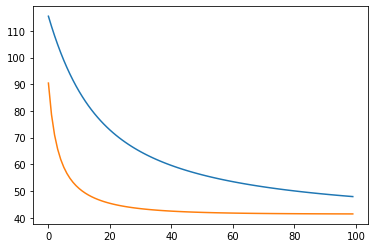

In [173]:
# plot the result
plt.plot(loss_hist_batch)
plt.plot(loss_hist_newton)